In [ ]:
!pip install geopandas

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd #for geopandas dataframe
import json
import matplotlib.pyplot as plt
from shapely.geometry import point 

In [2]:
#export all the geospatial data
data=gpd.read_file("export.geojson")
data1=gpd.read_file("export (1).geojson")
data2=gpd.read_file("export (2).geojson")
data3=gpd.read_file("export (3).geojson")
data4=gpd.read_file("export (4).geojson")
data5=gpd.read_file("export (5).geojson")
data6=gpd.read_file("export (6).geojson")
data7=gpd.read_file("export (7).geojson")
data8=gpd.read_file("export (8).geojson")
data9=gpd.read_file("export (9).geojson")
data10=gpd.read_file("export (10).geojson")
data11=gpd.read_file("export (11).geojson")
data12=gpd.read_file("export (12).geojson")
data13=gpd.read_file("export (13).geojson")

In [3]:
data.head()

,id,@id,amenity,name,note,name:en,name:hi,drinking_water,description,fee,geometry
0,node/1347506447,node/1347506447,drinking_water,None,None,None,None,None,None,None,POINT (77.06469 28.49553)
1,node/1667667621,node/1667667621,drinking_water,Drinking Water,None,None,None,None,None,None,POINT (77.11226 28.67575)
2,node/1792774364,node/1792774364,drinking_water,None,None,None,None,None,None,None,POINT (76.98386 28.61723)
3,node/2217936794,node/2217936794,drinking_water,Water Pump,None,None,None,None,None,None,POINT (77.17962 28.70360)
4,node/3413008749,node/3413008749,drinking_water,None,None,None,None,None,None,None,POINT (77.67790 27.57197)


#### There are many column which has no value so i have to remove that column.

In [4]:
#i want only id,amenity and geometry from the data.
data20=data[['id','amenity','geometry']]
data21=data1[['id','amenity','geometry']]
data22=data2[['id','amenity','geometry']]
data23=data3[['id','amenity','geometry']]
data24=data4[['id','amenity','geometry']]
data25=data5[['id','amenity','geometry']]
data26=data6[['id','amenity','geometry']]
data27=data7[['id','amenity','geometry']]
data28=data8[['id','amenity','geometry']]
data29=data9[['id','amenity','geometry']]
data30=data10[['id','amenity','geometry']]
data31=data11[['id','amenity','geometry']]
data32=data12[['id','amenity','geometry']]
data33=data13[['id','amenity','geometry']]

In [5]:
#i merged all the dataframe into new one
df=pd.concat([data20,data21,data22,data23,data24,data25,data26,data27,data28,data29,data30,data31,data32,data33])

In [6]:
df.shape

(1287, 3)

In [7]:
df.head()

,id,amenity,geometry
0,node/1347506447,drinking_water,POINT (77.06469 28.49553)
1,node/1667667621,drinking_water,POINT (77.11226 28.67575)
2,node/1792774364,drinking_water,POINT (76.98386 28.61723)
3,node/2217936794,drinking_water,POINT (77.17962 28.70360)
4,node/3413008749,drinking_water,POINT (77.67790 27.57197)


In [8]:
df['amenity'].unique() # There are 14 type of amenities

array(['drinking_water', 'pub', 'restaurant', 'toilets', 'school',
       'cinema', 'hospital', 'atm', 'parking', 'internet_cafe', 'embassy',
       'events_venue', 'fire_station', 'pharmacy'], dtype=object)

In [9]:
#extracted longitude and latitude from geometry
df['longitude'] = df['geometry'].x
df['latitude'] = df['geometry'].y

In [10]:
import seaborn as sns

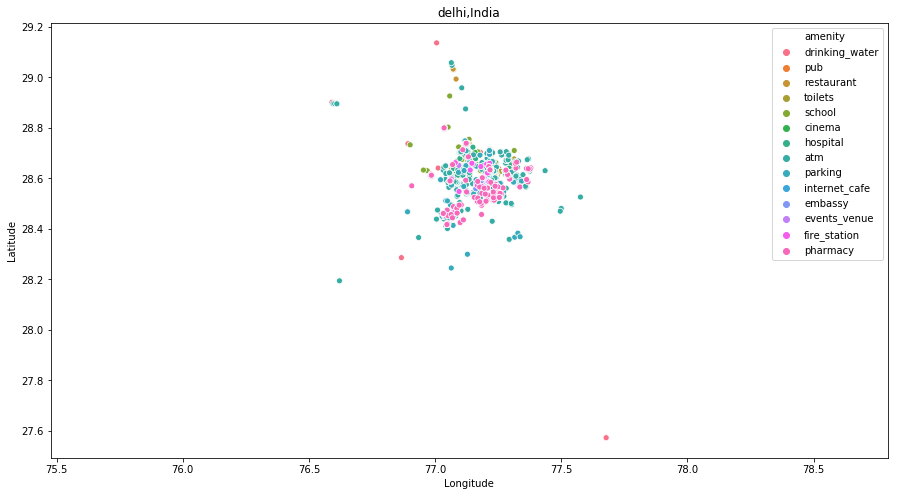

In [12]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df['longitude'],df['latitude'],hue=df['amenity'])
plt.title('delhi,India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

#### There are some outlier means that amenities are at the border of delhi .

In [13]:
df3=df.copy()

In [14]:
#Filtered the row for some more visualization
df10=df3[df3['amenity']=='cinema']
df11=df3[df3['amenity']=='atm']
df12=df3[df3['amenity']=='hospital']
df13=df3[df3['amenity']=='events_venue']
df14=df3[df3['amenity']=='fire_station']
df15=df3[df3['amenity']=='parking']
df16=df3[df3['amenity']=='pub']
df17=df3[df3['amenity']=='embassy']
df18=df3[df3['amenity']=='restaurant']
df19=df3[df3['amenity']=='internet_cafe']

In [17]:
df20=pd.concat([df12,df11])
df21=pd.concat([df13,df14])
df22=pd.concat([df10,df15])
df23=pd.concat([df12,df15])
df24=pd.concat([df13,df15])
df25=pd.concat([df10,df18,df16])
df26=pd.concat([df17,df19])
df27=pd.concat([df10,df11])

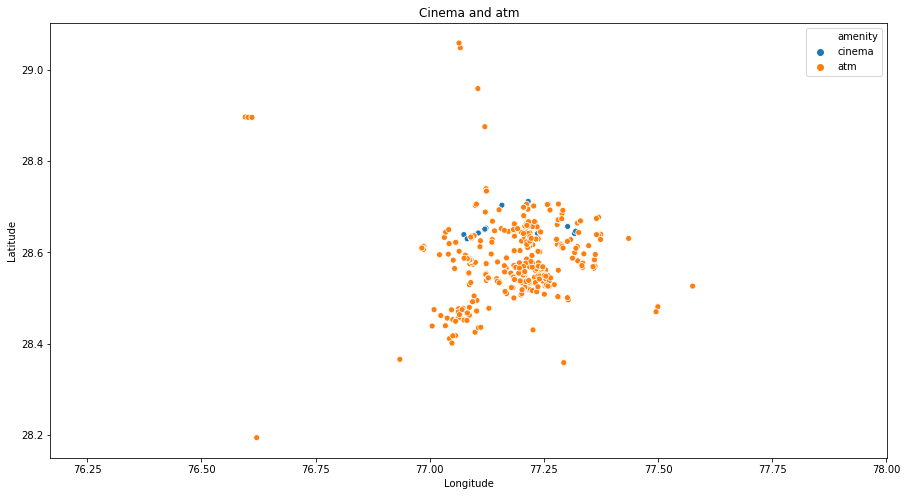

In [19]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df27['longitude'],df27['latitude'],hue=df27['amenity'])
plt.title('Cinema and atm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


#### In the above graph, Atm is near most of the cinema Hall.

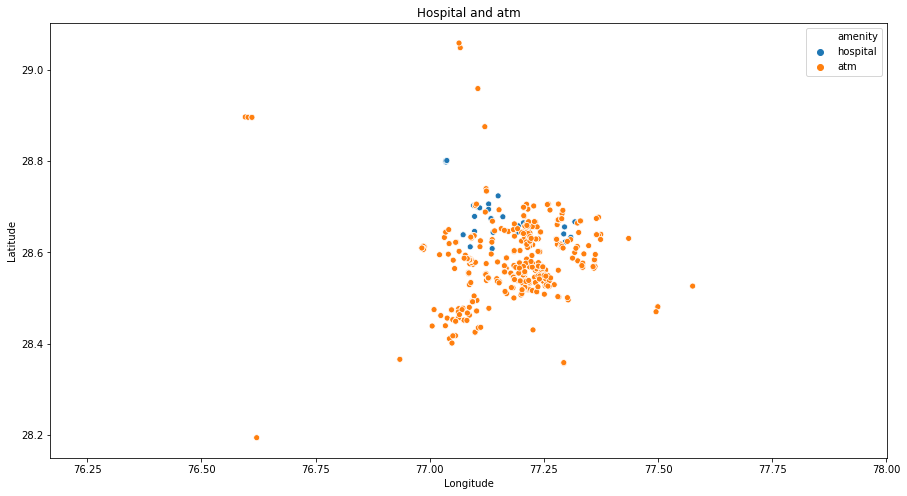

In [27]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df20['longitude'],df20['latitude'],hue=df20['amenity'])
plt.title('Hospital and atm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

#### In the above Graph,one hospital do not have any nearby ATM

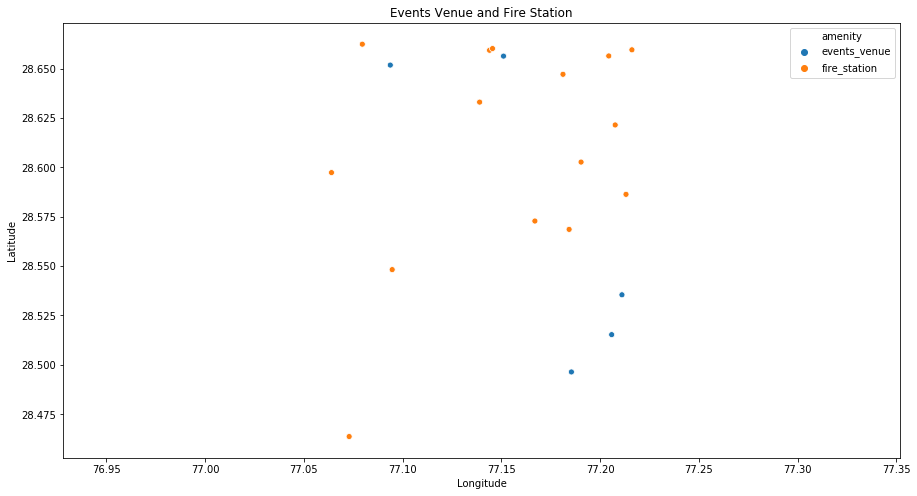

In [30]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df21['longitude'],df21['latitude'],hue=df21['amenity'])
plt.title('Events Venue and Fire Station')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


#### In the above graph,event venue are very far from the fire station

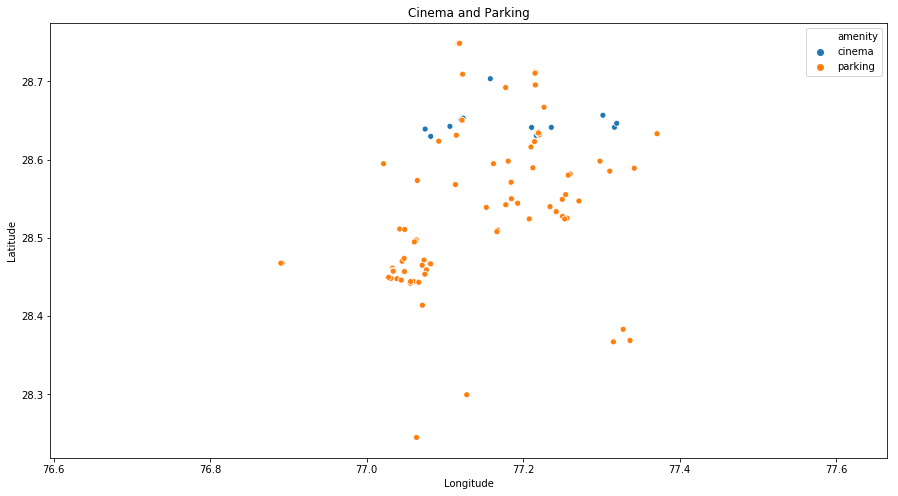

In [28]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df22['longitude'],df22['latitude'],hue=df22['amenity'])
plt.title('Cinema and Parking')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


#### In the above Graph,MAny Cinema Hall do not have any parking area

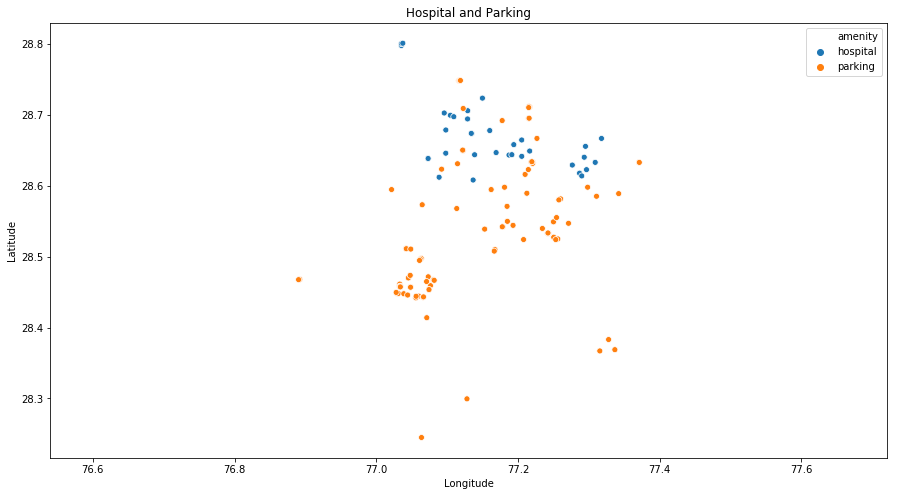

In [31]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df23['longitude'],df23['latitude'],hue=df23['amenity'])
plt.title('Hospital and Parking')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()



#### In the above Graph, Many Hospital do not have the parking area .

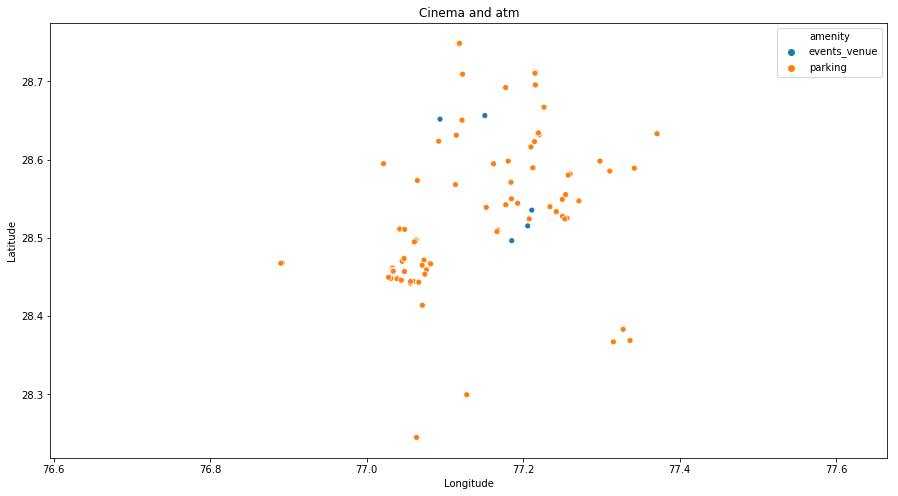

In [24]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df24['longitude'],df24['latitude'],hue=df24['amenity'])
plt.title('Events venue and Parking')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


#### In the above Graph,Many event venue do not have the parking area

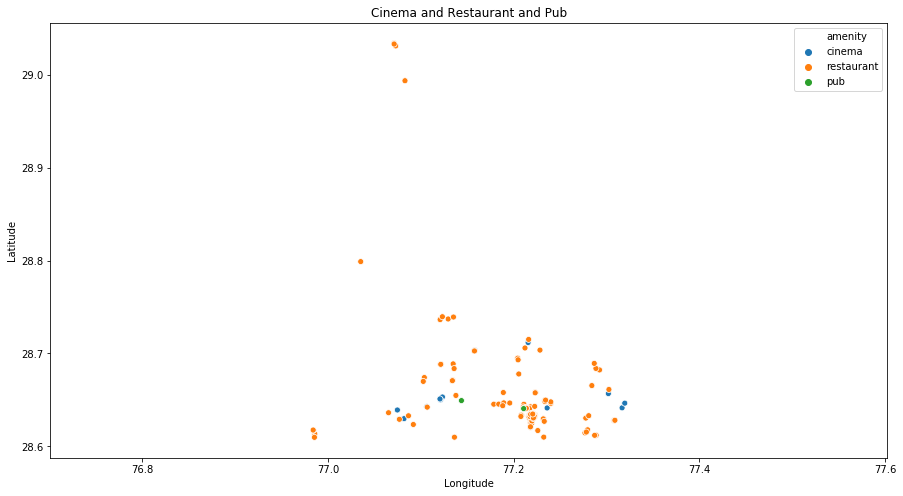

In [29]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df25['longitude'],df25['latitude'],hue=df25['amenity'])
plt.title('Cinema and Restaurant and Pub')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()



### In the above graph, most of the restaurant and Pub are near to the cinema hall

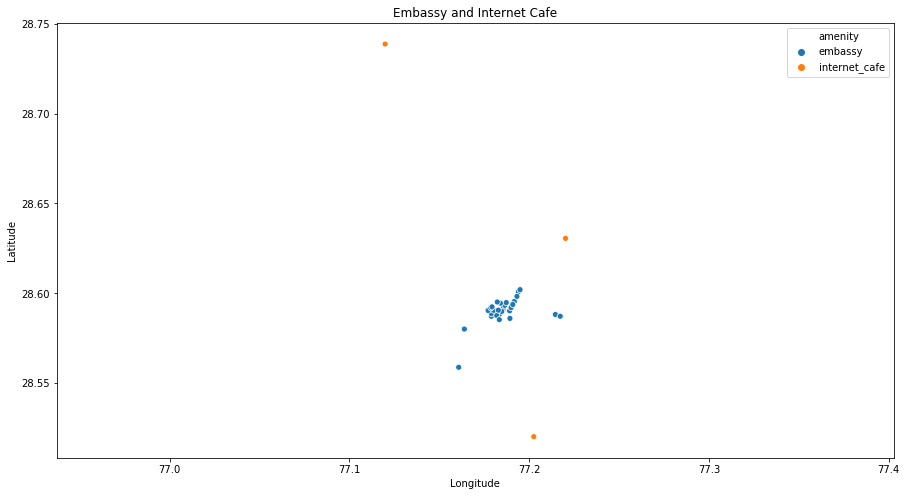

In [32]:
plt.figure(figsize=(15, 8))
sns.scatterplot(df26['longitude'],df26['latitude'],hue=df26['amenity'])
plt.title('Embassy and Internet Cafe')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


#### In the above Graph,No internet Cafe are near to the Embassy.

In [33]:
#Label encoding of categorical column
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['amenity']= label_encoder.fit_transform(df['amenity'])

In [34]:
df=df.drop(['id'],axis=1)

In [35]:
df=df.drop(['geometry'],axis=1)

## K-Means Clustering

In [39]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=10)
k.fit(df)
pred = k.predict(df)
clusters = range(1,10)
sse = []

for i in clusters:
    k = KMeans(n_clusters=i)
    model = k.fit(df)
    sse.append(k.inertia_)

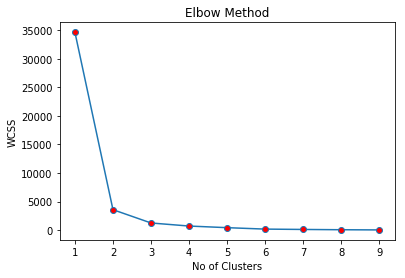

In [40]:
plt.plot(clusters, sse, "-o", markerfacecolor = "r")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

### In the above Elbow Plot, At 3 or 4 ,elbow become almost parallel so the no. of cluster will be 3 or 4

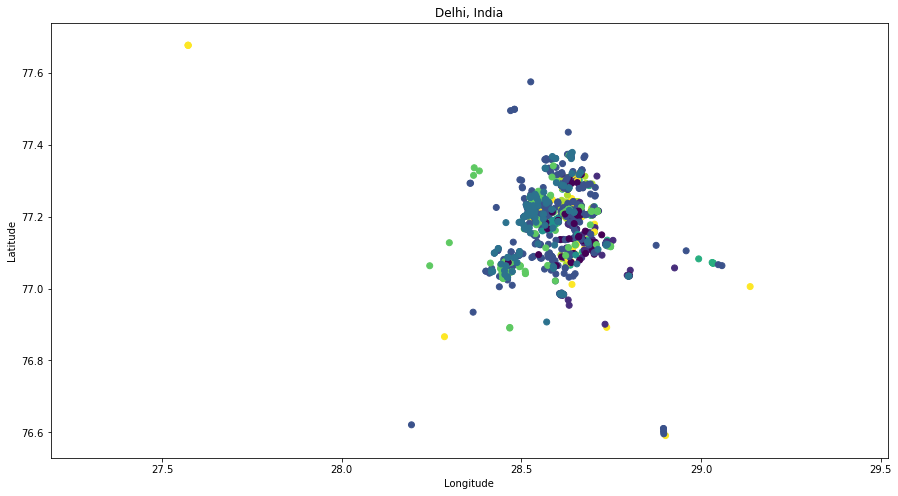

In [42]:
plt.figure(figsize=(15, 8))
plt.scatter(df['latitude'],df['longitude'], c=k.labels_.astype(float))
plt.title('Delhi, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

#### Here are 4 colors ,so the number of cluster should be 4

## DBSCAN Agorithm

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
clustering= DBSCAN(eps=0.05, min_samples=2).fit(df) 

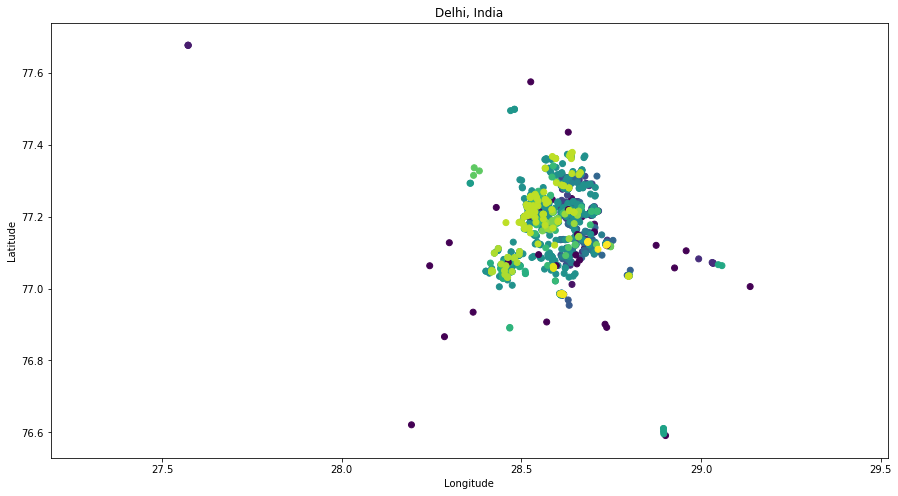

In [45]:
plt.figure(figsize=(15, 8))
plt.scatter(df['latitude'],df['longitude'], c=clustering.labels_.astype(float))
plt.title('Delhi, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

### According to DBSCAN Algorithm, The no. of cluster is 4

In [48]:
import shapefile as shp 

In [85]:
df['geometry'] = df.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)

In [87]:
df = gpd.GeoDataFrame(df, geometry='geometry')

In [88]:
df.to_file('MyGeometries.shp', driver='ESRI Shapefile')